In [28]:
import pandas as pd
import nltk
import numpy as np
import pymorphy2 as pymorphy2
import seaborn as sns
import inspect
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('preprocessed_posts.csv')
df.head()

,Unnamed: 0,id,date,text,publisher,reaction,comment,token,token_lem
0,0,95367da2-8313-49c4-81f5-cbb1f8af69be,2023-01-14 17:17:08.793,что происходит на мосбирже останется на мосбир...,Pulse_Official,161,111.0,"['происходит', 'мосбирже', 'останется', 'мосби...",происходить мосбиржа остаться мосбиржа эгегей ...
1,1,c179933b-b992-41a8-953c-e8cddce0a277,2023-01-13 16:30:00.000,в прямом эфире василий олейник и ирина ахмадул...,Tinkoff_Investments,140,29.0,"['прямом', 'эфире', 'василий', 'олейник', 'ири...",прямой эфир василий олейник ирина ахмадуллин о...
2,2,9ee444e3-0ff1-4622-82b9-6ff7b1d00ec7,2023-01-12 06:50:00.000,доброе утро продолжаем говорить на тематику ма...,Invest_Dim,315,149.0,"['доброе', 'утро', 'продолжаем', 'говорить', '...",добрый утро продолжать говорить тематика манип...
3,3,4963f23d-f3ef-4c53-903e-74f62b851aab,2023-01-13 16:25:00.000,российский рынок напоминаем что по акциям сбер...,Tinkoff_Investments,67,15.0,"['российский', 'рынок', 'напоминаем', 'акциям'...",российский рынок напоминать акция сбер обык от...
4,4,bedb0a0f-7657-4d27-a1fd-0b8005813eb5,2023-01-12 13:41:00.000,инфляционные ожидания что такое и зачем их оц...,FinDay,105,12.0,"['инфляционные', 'ожидания', 'такое', 'оценива...",инфляционный ожидание оценивать экономика жить...


In [30]:
df['token_lem'] = df['token_lem'].apply(lambda x: x.split())
print(df['token_lem'][0])

['происходить', 'мосбиржа', 'остаться', 'мосбиржа', 'эгегей', 'инвестор', 'начало', 'год', 'мы', 'казаться', 'бодрый', 'бывать', 'индекс', 'мосбиржа', 'отжиматься', 'бросок', 'пока', 'сам', 'знать', 'голубой', 'фишка', 'флиртовать', 'скользящий', 'средний', 'бумага', 'третий', 'эшелон', 'глядеть', 'отправиться', 'погоня', 'вояджер', 'ситуация', 'опытный', 'инвестор', 'утратить', 'бдительность', 'засуетиться', 'пустить', 'портфель', 'откос', 'сбиться', 'рациональный', 'путь', 'предлагать', 'ориентироваться', 'один', 'число', 'именно', 'оценить', 'российский', 'рынок', 'мультипликатор', 'pe', 'минимум', 'история', 'намекать', 'курс', 'мультипликатор', 'научить', 'самый', 'отъявленный', 'гуманитарий', 'жонглировать', 'финансовый', 'показатель']


In [31]:

from sklearn.feature_extraction.text import TfidfVectorizer

series_lem_sentences = [" ".join(i) for i in df['token_lem']]
vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.05, ngram_range=(1, 3))
X = vectorizer.fit_transform(series_lem_sentences)


In [32]:
X

<3450x637 sparse matrix of type '<class 'numpy.float64'>'
	with 234800 stored elements in Compressed Sparse Row format>

Epsilon: 0.5
Estimated number of clusters: 2
Estimated number of noise points: 3322
Epsilon: 0.5777777777777777
Estimated number of clusters: 4
Estimated number of noise points: 3298
Epsilon: 0.6555555555555556
Estimated number of clusters: 10
Estimated number of noise points: 3236
Epsilon: 0.7333333333333334
Estimated number of clusters: 19
Estimated number of noise points: 3136
Epsilon: 0.8111111111111111
Estimated number of clusters: 24
Estimated number of noise points: 2957
Epsilon: 0.8888888888888888
Estimated number of clusters: 36
Estimated number of noise points: 2578
Epsilon: 0.9666666666666667
Estimated number of clusters: 20
Estimated number of noise points: 1903
Epsilon: 1.0444444444444445
Estimated number of clusters: 9
Estimated number of noise points: 942
Epsilon: 1.1222222222222222
Estimated number of clusters: 1
Estimated number of noise points: 166
Epsilon: 1.2
Estimated number of clusters: 1
Estimated number of noise points: 3
The optimal epsilon value is:  0.5


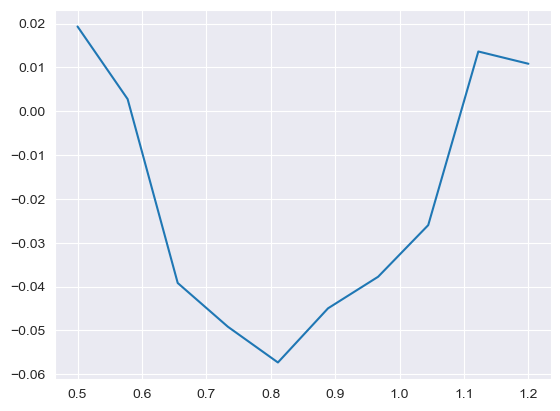

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = np.linspace(0.5, 1.2, 10)
silhouette_values = []
for eps in eps_values:
    db = DBSCAN(eps=eps).fit(X)
    labels = db.labels_
    if len(set(labels)) < 2:
        print("Epsilon:", eps)
        print("Only 1 cluster")
        continue

    silhouette_values.append(silhouette_score(X, labels))
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print("Epsilon:", eps)
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
best_eps = eps_values[np.argmax(silhouette_values)]
print("The optimal epsilon value is: ", best_eps)
plt.plot(eps_values, silhouette_values)

D:\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


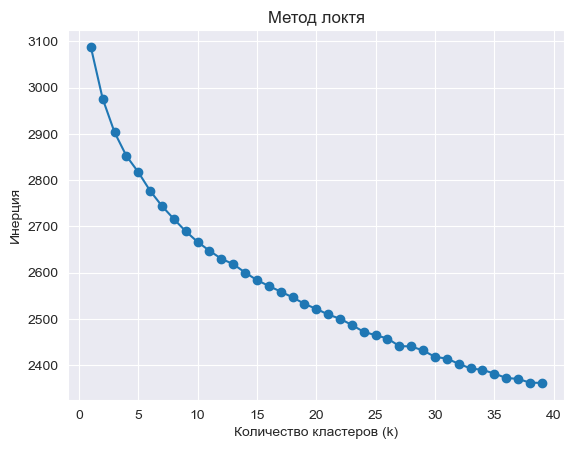

In [34]:
from sklearn.cluster import KMeans

k_list = range(1, 40)

inertias = []

for k in k_list:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(k_list, inertias, '-o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.title('Метод локтя')
plt.show()

Пока что приходим к выводу что всё очень плохо для обоих этих видов кластеризации. В K-means очень большая инерция. В DBScan силуэт очень маленький, а также большинство постов даже не попадает в кластеры.

Попробуем посмотреть на график кластеров, при n_clusters=5

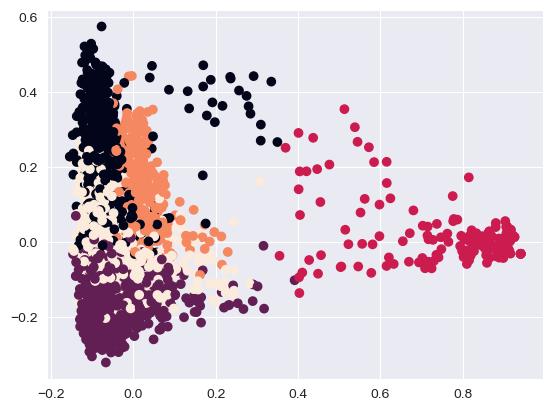

In [35]:
model = KMeans(n_clusters=5)
model.fit(X)
model.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Get the cluster labels
labels = model.labels_

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

In [37]:
df["target"] = model.labels_

In [38]:
df.target.head()

0    4
1    1
2    1
3    2
4    4
Name: target, dtype: int32

In [40]:
df.to_csv('clustered_posts.csv', index=False)